<a href="https://colab.research.google.com/github/pauNancy21/Tareas-Ciencia-Datos/blob/main/C%C3%B3digo_fuente_ASE_I_NPGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumna: Nancy Paulina González Reyes

No. de cuenta: 217374-6

In [2]:
#Se instalan las librerías que se van a utilizar
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Se importan las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io
import random 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
#Cargar los archivos
from google.colab import files
uploaded = files.upload()

Saving Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2).csv to Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2).csv
Saving Análisis de violencia hacia las mujeres en el metro.csv to Análisis de violencia hacia las mujeres en el metro.csv


In [19]:
#Leer los archivos
violenciametro = pd.read_csv(io.BytesIO(uploaded['Análisis de la violencia y abusos sexuales en el sistema de metro de la CDMX (2).csv']), sep = ',')
analisisviolencia = pd.read_csv(io.BytesIO(uploaded['Análisis de violencia hacia las mujeres en el metro.csv']), sep = ',')
# Forma de los datos
print('Base shape: ', violenciametro.shape)
print('Encuesta shape: ', analisisviolencia.shape)

Base shape:  (259, 12)
Encuesta shape:  (54, 12)


In [20]:
# Se crea una secuencia de DataFrame 
frames = [violenciametro, analisisviolencia]
#Se concatenan los archivos
datos = pd.concat(frames, sort = False)
datos

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,tipo acoso,horario,capacidad del metro,reaccion,denuncio,razon,Tu agresor fue
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,NaN,NaN,NaN,NaN,NaN,NaN,Tocamiento de tu cuerpo;Besos forzados;,NaN,NaN,NaN,...,29.0,"TACUBAYA, UNIVERSIDAD",TACUBAYA,Acoso físico ;,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE
50,NaN,NaN,NaN,NaN,NaN,NaN,Miradas lascivas ;Piropos sexuales;,NaN,NaN,NaN,...,32.0,"EL ROSARIO, OBSERVATORIO",PINO SUÁREZ,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,MUJER
51,NaN,NaN,NaN,NaN,NaN,NaN,Tocamiento de tu cuerpo;,NaN,NaN,NaN,...,35.0,"TACUBAYA, CONSTITUYENTES",PINO SUÁREZ,Acoso físico ;,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE
52,NaN,NaN,NaN,NaN,NaN,NaN,Miradas lascivas ;,NaN,NaN,NaN,...,21.0,"PINO SUÁREZ, PANTITLAN, CIUDAD AZTECA",PANTITLAN,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER


In [22]:
# Forma de los datos
print('Datos shape: ', datos.shape)
# Mostrar las primeros 4 filas del DataFrame concatenado
datos.head(5)

Datos shape:  (313, 22)


,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,tipo acoso,horario,capacidad del metro,reaccion,denuncio,razon,Tu agresor fue
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
datos.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,tipo acoso,horario,capacidad del metro,reaccion,denuncio,razon,Tu agresor fue
49,NaN,NaN,NaN,NaN,NaN,NaN,Tocamiento de tu cuerpo;Besos forzados;,NaN,NaN,NaN,...,29.0,"TACUBAYA, UNIVERSIDAD",TACUBAYA,Acoso físico ;,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE
50,NaN,NaN,NaN,NaN,NaN,NaN,Miradas lascivas ;Piropos sexuales;,NaN,NaN,NaN,...,32.0,"EL ROSARIO, OBSERVATORIO",PINO SUÁREZ,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,MUJER
51,NaN,NaN,NaN,NaN,NaN,NaN,Tocamiento de tu cuerpo;,NaN,NaN,NaN,...,35.0,"TACUBAYA, CONSTITUYENTES",PINO SUÁREZ,Acoso físico ;,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE
52,NaN,NaN,NaN,NaN,NaN,NaN,Miradas lascivas ;,NaN,NaN,NaN,...,21.0,"PINO SUÁREZ, PANTITLAN, CIUDAD AZTECA",PANTITLAN,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER
53,NaN,NaN,NaN,NaN,NaN,NaN,Miradas lascivas ;Tocamiento de tu cuerpo;,NaN,NaN,NaN,...,32.0,"CHAPULTEPEC, AUDITORIO, PINO SUAREZ",BELLAS ARTES,Acoso físico ;Acoso visual;,Las horas pico del metro;,Estaba lleno,Coraje \n,No,Había mucha gente y se alejó,HOMBRE


In [24]:
#tipo de datos
datos.dtypes

estacion                object
linea                   object
dia                     object
hora-inicio-reporte     object
hora-fin-reporte        object
descripcion             object
delito                  object
sexo-victima            object
edad-victima           float64
sexo-agresor            object
edad-agresor             int64
sin-detenido            object
edad                   float64
estacion frecuente      object
Estacion                object
tipo acoso              object
horario                 object
capacidad del metro     object
reaccion                object
denuncio                object
razon                   object
Tu agresor fue          object
dtype: object

In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 53
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   estacion             259 non-null    object 
 1   linea                259 non-null    object 
 2   dia                  259 non-null    object 
 3   hora-inicio-reporte  259 non-null    object 
 4   hora-fin-reporte     259 non-null    object 
 5   descripcion          259 non-null    object 
 6   delito               299 non-null    object 
 7   sexo-victima         259 non-null    object 
 8   edad-victima         259 non-null    float64
 9   sexo-agresor         259 non-null    object 
 10  edad-agresor         313 non-null    int64  
 11  sin-detenido         9 non-null      object 
 12  edad                 54 non-null     float64
 13  estacion frecuente   54 non-null     object 
 14  Estacion             52 non-null     object 
 15  tipo acoso           54 non-null     obje

In [26]:
datos.describe()

,edad-victima,edad-agresor,edad
count,259.000000,313.000000,54.000000
mean,26.926641,36.632588,32.296296
std,9.808161,11.972558,13.360925
min,1.000000,16.000000,16.000000
25%,20.000000,28.000000,21.500000
50%,25.000000,35.000000,28.500000
75%,31.000000,45.000000,37.250000
max,84.000000,73.000000,70.000000


In [27]:
# Checar los datos con valores NA 
datos_NA = datos.isna().sum()
violenciametro_NA = datos.isna().sum()
analisisviolencia_NA = datos.isna().sum()

pd.concat([violenciametro_NA, analisisviolencia_NA, datos_NA], axis=1, sort = False, keys = ['Violencia NA', 'Encuesta NA', 'Datos NA'])

,Violencia NA,Encuesta NA,Datos NA
estacion,54,54,54
linea,54,54,54
dia,54,54,54
hora-inicio-reporte,54,54,54
hora-fin-reporte,54,54,54
descripcion,54,54,54
delito,14,14,14
sexo-victima,54,54,54
edad-victima,54,54,54
sexo-agresor,54,54,54


In [28]:
#Mostrar el por ciento de los datos faltantes 
for column in datos.columns:
    percentage = datos[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

estacion: 17.25%
linea: 17.25%
dia: 17.25%
hora-inicio-reporte: 17.25%
hora-fin-reporte: 17.25%
descripcion: 17.25%
delito: 4.47%
sexo-victima: 17.25%
edad-victima: 17.25%
sexo-agresor: 17.25%
edad-agresor: 0.0%
sin-detenido: 97.12%
edad: 82.75%
estacion frecuente: 82.75%
Estacion: 83.39%
tipo acoso: 82.75%
horario: 82.75%
capacidad del metro: 82.75%
reaccion: 83.07%
denuncio: 82.75%
razon: 87.54%
Tu agresor fue : 83.07%


In [29]:
#Mejor visualización
datos.isnull().sum().sort_values(ascending=False)

sin-detenido           304
razon                  274
Estacion               261
reaccion               260
Tu agresor fue         260
estacion frecuente     259
denuncio               259
capacidad del metro    259
horario                259
edad                   259
tipo acoso             259
hora-fin-reporte        54
dia                     54
hora-inicio-reporte     54
descripcion             54
linea                   54
sexo-agresor            54
edad-victima            54
sexo-victima            54
estacion                54
delito                  14
edad-agresor             0
dtype: int64

In [30]:
#Eliminación de filas o columnas
no_detenido = datos[datos["sin-detenido"].isnull()].index
datos_clear = datos.drop(no_detenido, axis=0) 

#no_dia = datos[datos["dia"].isnull()].index
#datos_clear = datos.drop(no_dia, axis=0) 

In [31]:
#Sustitur los valores por la moda
#La moda reemplaza los datos categóricos
mode = "".join(datos["Estacion"].mode())
datos["Estacion"].fillna(mode, inplace=True)

mode = "".join(datos["estacion"].mode())
datos["estacion"].fillna(mode, inplace=True)

mode = "".join(datos["reaccion"].mode())
datos["reaccion"].fillna(mode, inplace=True)

mode = "".join(datos["estacion frecuente"].mode())
datos["estacion frecuente"].fillna(mode, inplace=True)

mode = "".join(datos["horario"].mode())
datos["horario"].fillna(mode, inplace=True)

mode = "".join(datos["capacidad del metro"].mode())
datos["capacidad del metro"].fillna(mode, inplace=True)

mode = "".join(datos["denuncio"].mode())
datos["denuncio"].fillna(mode, inplace=True)

#mode = "".join(datos["sexo agresor"].mode())
#datos["sexo agresor"].fillna(mode, inplace=True)

mode = "".join(datos["denuncio"].mode())
datos["denuncio"].fillna(mode, inplace=True)

mode = "".join(datos["sexo-agresor"].mode())
datos["sexo-agresor"].fillna(mode, inplace=True)

mode = "".join(datos["sexo-victima"].mode())
datos["sexo-victima"].fillna(mode, inplace=True)

mode = "".join(datos["hora-inicio-reporte"].mode())
datos["hora-inicio-reporte"].fillna(mode, inplace=True)

#mode = "".join(datos["hora-fin-reporte"].mode())
#datos["hora-fin-reporte"].fillna(mode, inplace=True)

In [32]:
#Sustitur los valores por la media
#La media reemplaza los datos numéricos

mean = (datos["edad-victima"].mean())
datos["edad-victima"].fillna(mean, inplace=True)

mean = (datos["edad"].mean())
datos["edad"].fillna(mean, inplace=True)

mean = (datos["edad-agresor"].mean())
datos["edad-agresor"].fillna(mean, inplace=True)

#mean = (datos["edad agresor"].mean())
#datos["edad agresor"].fillna(mean, inplace=True)



In [33]:
datos.head(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,tipo acoso,horario,capacidad del metro,reaccion,denuncio,razon,Tu agresor fue
0,SAN PEDRO DE LOS PINOS,7,MARTES,19:30,00:46,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,23.0,HOMBRE,...,32.296296,MERCED,HIDALGO,NaN,La tarde ;,Estaba lleno,Miedo,No,NaN,NaN
1,OCEANÍA,5,JUEVES,14:01,19:30,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,31.0,HOMBRE,...,32.296296,MERCED,HIDALGO,NaN,La tarde ;,Estaba lleno,Miedo,No,NaN,NaN
2,MERCED,1,LUNES,09:43,10:15,TOCAMIENTO EN GENITALES,ABUSO SEXUAL,HOMBRE,18.0,HOMBRE,...,32.296296,MERCED,HIDALGO,NaN,La tarde ;,Estaba lleno,Miedo,No,NaN,NaN
3,SANTA ANITA,8,LUNES,14:55,21:40,TOMA DE FOTOGRAFÍAS,ACOSO SEXUAL,MUJER,27.0,HOMBRE,...,32.296296,MERCED,HIDALGO,NaN,La tarde ;,Estaba lleno,Miedo,No,NaN,NaN
4,INSURGENTES,1,LUNES,16:36,17:35,TOCAMIENTO EN GLÚTEO,ABUSO SEXUAL,MUJER,24.0,HOMBRE,...,32.296296,MERCED,HIDALGO,NaN,La tarde ;,Estaba lleno,Miedo,No,NaN,NaN


In [34]:
datos.tail(5)

,estacion,linea,dia,hora-inicio-reporte,hora-fin-reporte,descripcion,delito,sexo-victima,edad-victima,sexo-agresor,...,edad,estacion frecuente,Estacion,tipo acoso,horario,capacidad del metro,reaccion,denuncio,razon,Tu agresor fue
49,HIDALGO,NaN,NaN,09:00,NaN,NaN,Tocamiento de tu cuerpo;Besos forzados;,MUJER,26.926641,HOMBRE,...,29.0,"TACUBAYA, UNIVERSIDAD",TACUBAYA,Acoso físico ;,La mañana ;,Estaba lleno,No sabía que hacer,No,No sabía como,HOMBRE
50,HIDALGO,NaN,NaN,09:00,NaN,NaN,Miradas lascivas ;Piropos sexuales;,MUJER,26.926641,HOMBRE,...,32.0,"EL ROSARIO, OBSERVATORIO",PINO SUÁREZ,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,Incomodidad,No,No lo sentí peligroso,MUJER
51,HIDALGO,NaN,NaN,09:00,NaN,NaN,Tocamiento de tu cuerpo;,MUJER,26.926641,HOMBRE,...,35.0,"TACUBAYA, CONSTITUYENTES",PINO SUÁREZ,Acoso físico ;,La tarde ;,Estaba lleno,Incomodidad,No,No supe quién fue,HOMBRE
52,HIDALGO,NaN,NaN,09:00,NaN,NaN,Miradas lascivas ;,MUJER,26.926641,HOMBRE,...,21.0,"PINO SUÁREZ, PANTITLAN, CIUDAD AZTECA",PANTITLAN,Acoso visual;Acoso verbal ;,La mañana ;,Estaba vacío,"Asco, Ignorancia",No,Lo ignore,MUJER
53,HIDALGO,NaN,NaN,09:00,NaN,NaN,Miradas lascivas ;Tocamiento de tu cuerpo;,MUJER,26.926641,HOMBRE,...,32.0,"CHAPULTEPEC, AUDITORIO, PINO SUAREZ",BELLAS ARTES,Acoso físico ;Acoso visual;,Las horas pico del metro;,Estaba lleno,Coraje \n,No,Había mucha gente y se alejó,HOMBRE


In [35]:
#Mejor visualización
datos.isnull().sum().sort_values(ascending=False)

sin-detenido           304
razon                  274
Tu agresor fue         260
tipo acoso             259
descripcion             54
dia                     54
linea                   54
hora-fin-reporte        54
delito                  14
hora-inicio-reporte      0
denuncio                 0
reaccion                 0
capacidad del metro      0
horario                  0
edad                     0
Estacion                 0
estacion frecuente       0
edad-agresor             0
sexo-agresor             0
edad-victima             0
sexo-victima             0
estacion                 0
dtype: int64

Análisis Exploratorio de Datos

In [ ]:
#edades_vic = datos[["edad","edad-victima"]]
#edades_vic

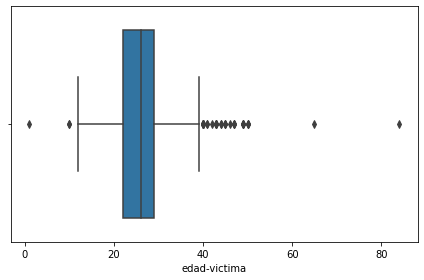

In [36]:
#Valores atípicos
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=datos["edad-victima"].fillna(0).astype(int))
fig.tight_layout()

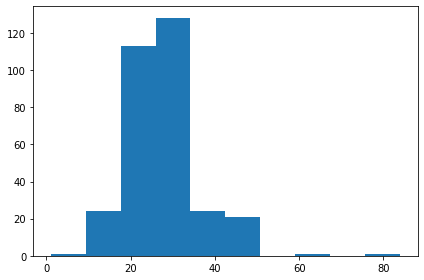

In [37]:
#Gráfica de la edad de las víctimas
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(datos["edad-victima"].fillna(0).astype(float))
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


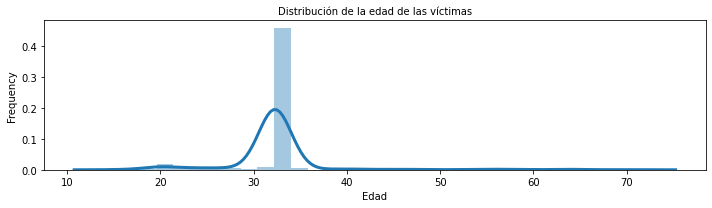

In [38]:
#Se muestra la distribución de las edades de las mujeres 
# set plot size
plt.figure(figsize=(10, 3))

# plot a univariate distribution of Age observations 
sns.distplot(datos[(datos[["edad","edad-victima"]] > 0)].edad, kde_kws={"lw": 3}, bins = 30)

# set titles and labels
plt.title('Distribución de la edad de las víctimas',fontsize= 10)
plt.xlabel('Edad')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

Se crea un dataframe con los datos de la violencia

In [39]:
estaciones = datos[["estacion","Estacion"]]
estaciones

,estacion,Estacion
0,SAN PEDRO DE LOS PINOS,HIDALGO
1,OCEANÍA,HIDALGO
2,MERCED,HIDALGO
3,SANTA ANITA,HIDALGO
4,INSURGENTES,HIDALGO
...,...,...
49,HIDALGO,TACUBAYA
50,HIDALGO,PINO SUÁREZ
51,HIDALGO,PINO SUÁREZ
52,HIDALGO,PANTITLAN


In [40]:
df = datos
df = df[df.columns[pd.Series(df.columns).str.startswith(('hora-inicio-reporte','descripcion','delito','sexo-agresor','edad-agresor','edad-victima'))]].copy()
df['estacion'] = datos['estacion'].tolist() 
df = df.drop(0)

df = df.set_index('estacion', drop = True)
print(df.head())

df_reportes_totales = df


             hora-inicio-reporte              descripcion        delito  \
estacion                                                                  
OCEANÍA                    14:01     TOCAMIENTO EN GLÚTEO  ABUSO SEXUAL   
MERCED                     09:43  TOCAMIENTO EN GENITALES  ABUSO SEXUAL   
SANTA ANITA                14:55      TOMA DE FOTOGRAFÍAS  ACOSO SEXUAL   
INSURGENTES                16:36     TOCAMIENTO EN GLÚTEO  ABUSO SEXUAL   
BELLAS ARTES               10:59     TOCAMIENTO EN GLÚTEO  ABUSO SEXUAL   

              edad-victima sexo-agresor  edad-agresor  
estacion                                               
OCEANÍA               31.0       HOMBRE            63  
MERCED                18.0       HOMBRE            36  
SANTA ANITA           27.0       HOMBRE            59  
INSURGENTES           24.0       HOMBRE            50  
BELLAS ARTES          22.0       HOMBRE            18  


In [41]:
#Se encuentra la estación con más violencia 
sumas = df.sum(axis=1)
max_index = sumas.idxmax() #Se copia el índice de la fila con la mayor suma

print ("Estación con más violencia: %s. Total de reportes: %d" % (max_index, sumas.max()))


Estación con más violencia: BALDERAS. Total de reportes: 134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Gráfica con las estaciones con más violencia en el metro

['BALDERAS', 'TACUBA', 'ZÓCALO', 'CHAPULTEPEC', 'VILLA DE CORTES', 'ZÓCALO', 'GUERRERO', 'GARIBALDI', 'ZÓCALO', 'VILLA DE CORTES']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Estación')

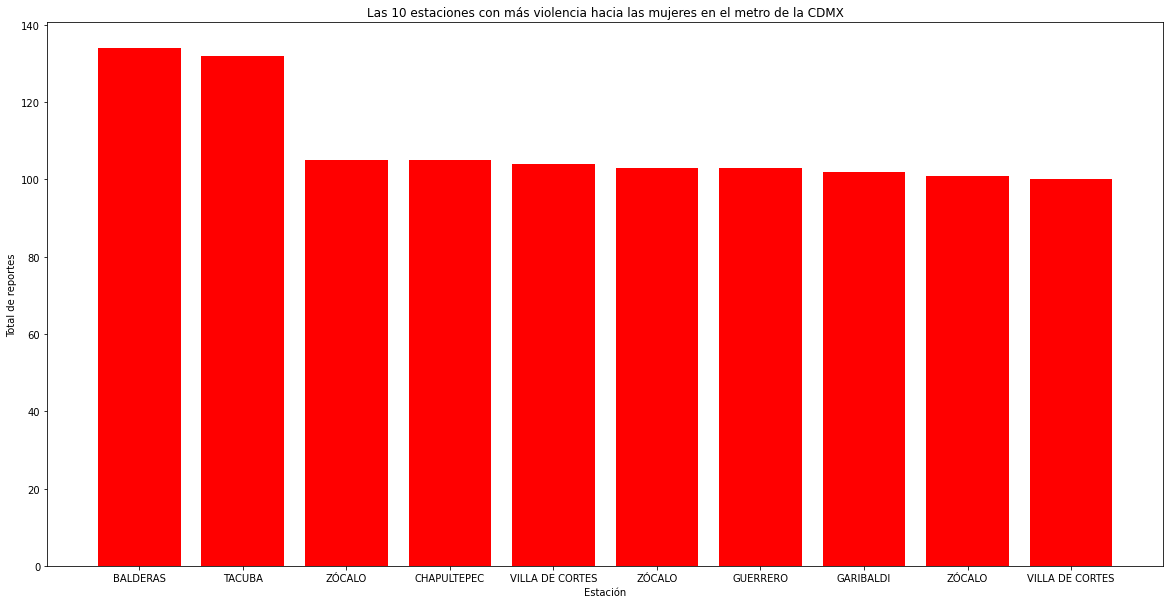

In [42]:
sumas = df.sum(axis=1)
sumas = sumas.nlargest(10)
estaciones = sumas.index.tolist() #Se guardan en una lista las estaciones con más reportes
print(estaciones)

plt.figure(figsize=(20, 10))
plt.bar(range(10), sumas, tick_label= estaciones, color = 'red')
plt.title ("Las 10 estaciones con más violencia hacia las mujeres en el metro de la CDMX")
plt.ylabel ("Total de reportes")
plt.xlabel ("Estación")

In [43]:
#Se encuentra la estación con más violencia 
sumas = df.sum(axis=1)
min_index = sumas.idxmin() #Se copia el índice de la fila con la mayor suma

print ("Estación con menos violencia: %s. Total de reportes: %d" % (min_index, sumas.min()))


Estación con menos violencia: BELLAS ARTES. Total de reportes: 34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Grafico linea: relación estaciones y horario

In [68]:
#plt.figure(figsize=(20, 10))
#plt.plot(datos['estaciones','hora-inicio-reporte'])
#plt.title ("Relación del horario con las estaciones")
#plt.ylabel ("Horario")
#plt.xlabel ("Estación")

df1 = datos
df1 = df1[df1.columns[pd.Series(df1.columns).str.startswith(('hora-inicio-reporte'))]]
df1['estacion'] = datos['estacion'].tolist() 

df_esta_hora = df1

df_reportes_totales.plot('estacion','hora-inicio-reporte')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


KeyError: ignored

Predicción del comportamiento de la violencia en el metro de la CDMX

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Reportes delitos en el STC .csv to Reportes delitos en el STC .csv


In [5]:
reportemetro = pd.read_csv(io.BytesIO(uploaded['Reportes delitos en el STC .csv']), sep = ',')

# Forma de los datos
print('Base shape: ', reportemetro.shape)


Base shape:  (17, 8)


In [6]:
reportemetro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   delito  17 non-null     object 
 1   2015    17 non-null     int64  
 2   2016    17 non-null     int64  
 3   2017    17 non-null     int64  
 4   2018    17 non-null     int64  
 5   2019    15 non-null     float64
 6   2020    16 non-null     float64
 7   2021    16 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.2+ KB


In [8]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

2019      2
2020      1
2021      1
delito    0
2015      0
2016      0
2017      0
2018      0
dtype: int64

In [10]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,ABUSO DE AUTORIDAD,0,2,1,1,0.0,0.0,0.0
1,ABUSO SEXUAL,127,202,195,149,383.0,169.0,270.0
2,AMENAZAS,0,0,2,1,3.0,3.0,2.0
3,DAÑO A PROPIEDAD AJENA,6,5,8,7,15.0,8.0,5.0
4,DISCRIMINACION,12,6,7,5,2.0,1.0,1.0


In [12]:
reportemetro.tail(5)

,delito,2015,2016,2017,2018,2019,2020,2021
12,ROBO A TRANSEUNTE,12,15,3,0,16.0,4.0,4.0
13,ROBO DE CELULAR,4,0,1,0,3.0,3.0,3.0
14,VIOLACION,0,3,1,0,NaN,2.0,3.0
15,VIOLENCIA FAMILIAR,13,5,1,9,15.0,16.0,14.0
16,TOTAL,265,346,308,253,789.0,436.0,374.0


In [13]:
#Sustitur los valores por la media
#La media reemplaza los datos numéricos

mean = (reportemetro["2019"].mean())
reportemetro["2019"].fillna(mean, inplace=True)

mean = (reportemetro["2020"].mean())
reportemetro["2020"].fillna(mean, inplace=True)

mean = (reportemetro["2019"].mean())
reportemetro["2021"].fillna(mean, inplace=True)


In [14]:
#Mejor visualización
reportemetro.isnull().sum().sort_values(ascending=False)

delito    0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64

In [15]:
reportemetro.head(5)

,delito,2015,2016,2017,2018,2019,2020,2021
0,ABUSO DE AUTORIDAD,0,2,1,1,0.0,0.0,0.0
1,ABUSO SEXUAL,127,202,195,149,383.0,169.0,270.0
2,AMENAZAS,0,0,2,1,3.0,3.0,2.0
3,DAÑO A PROPIEDAD AJENA,6,5,8,7,15.0,8.0,5.0
4,DISCRIMINACION,12,6,7,5,2.0,1.0,1.0


In [16]:
reportemetro.tail(5)

,delito,2015,2016,2017,2018,2019,2020,2021
12,ROBO A TRANSEUNTE,12,15,3,0,16.0,4.0,4.0
13,ROBO DE CELULAR,4,0,1,0,3.0,3.0,3.0
14,VIOLACION,0,3,1,0,105.2,2.0,3.0
15,VIOLENCIA FAMILIAR,13,5,1,9,15.0,16.0,14.0
16,TOTAL,265,346,308,253,789.0,436.0,374.0


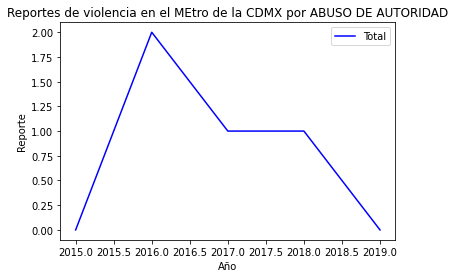

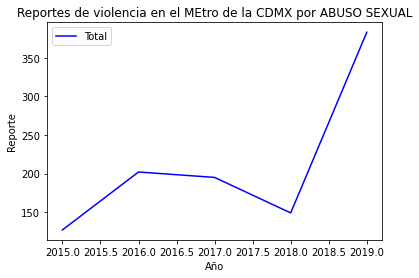

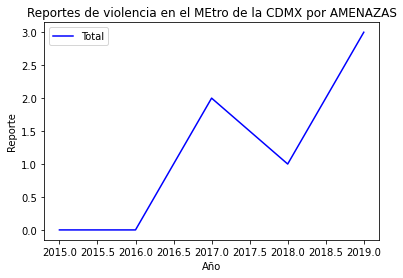

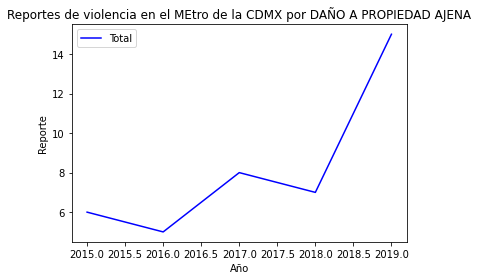

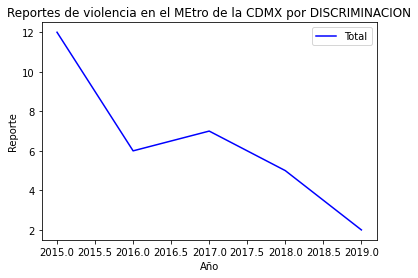

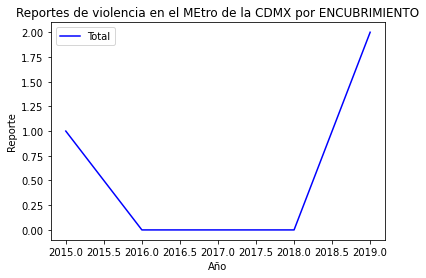

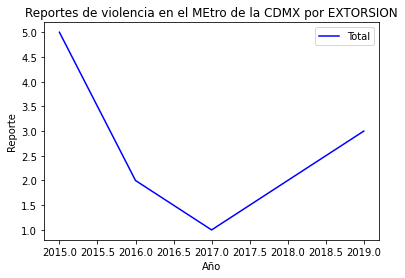

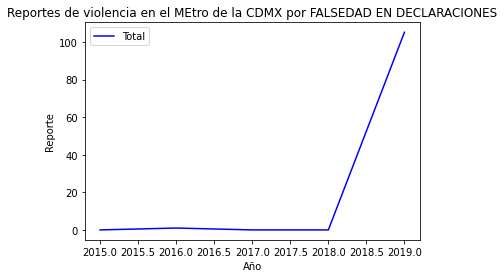

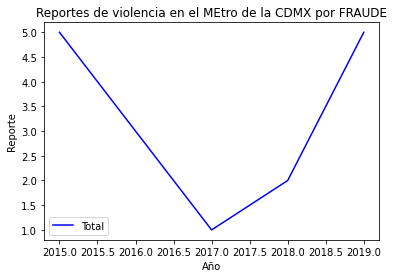

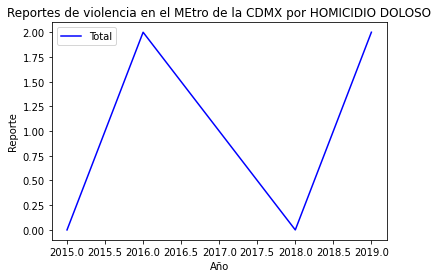

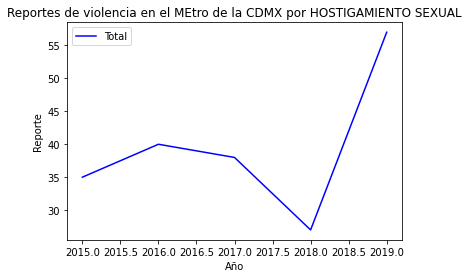

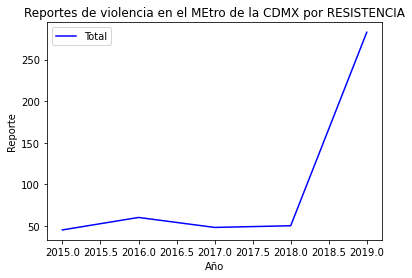

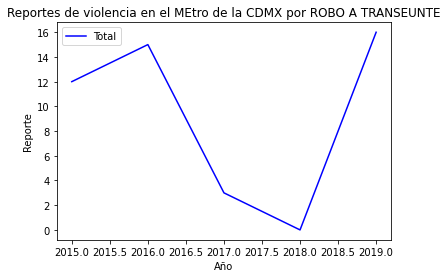

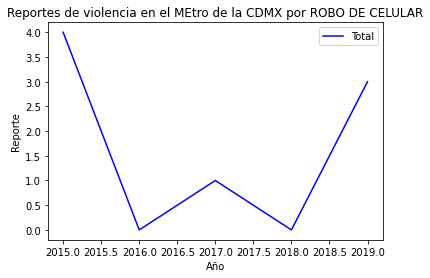

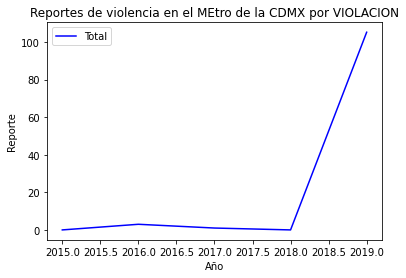

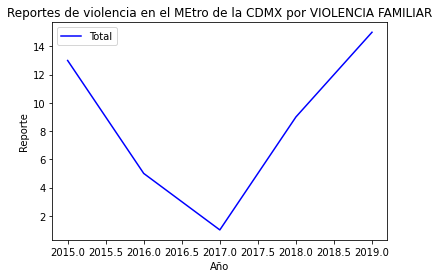

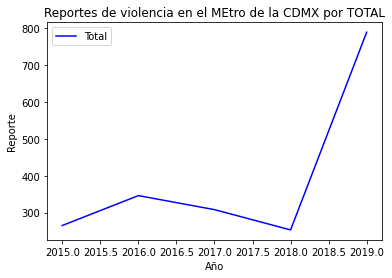

In [54]:
#Se guardan en una lista los nombres de los delitos
reporte = reportemetro["delito"].tolist()
reporte1 = reporte [:36]
reporte2 = reporte[36:]

Años = list(range(2015, 2020))

X = Años
k = 0
#Ciclo para graficar las tendencias de reportes
for i in reporte1:

  Total = []
  NE = []
  
  #Ciclo para guardar en un arreglo los reportes de violencia, por año
  l = 1
  for j in Años:
    Total.append(reportemetro.iat[k, l])
    #NE.append(reportemetro.iat[k, l+1])
    l += 1

  #Se grafican las cantidades con una línea por cada una
  plt.figure()
  plt.plot(X, Total, '-b',label='Total')

  #Si la fila corresponde al total, se pone el nombre del país
  if (i=="Total"):
    plt.title("Reportes de violencia en el Metro de la CDMX")
  else:
    plt.title("Reportes de violencia en el MEtro de la CDMX por %s" % i)

  plt.xlabel("Año")
  plt.ylabel("Reporte")

  plt.legend(loc='best')
  plt.show()

  k+=1

In [55]:
#Se crea un dataframe con los datos de los años y delitos
df = reportemetro
df = df[df.columns[pd.Series(df.columns).str.startswith(('2015','2016','2017','2018','2019','2020','2021'))]].copy()#Se guardan las columnas que contienen datos de feminicidios
df['delito'] = reportemetro['delito'].tolist() #Se copia la columna de las entidades
df = df.drop(0) #Se elimina la fila de 'Total'

df = df.set_index('delito', drop = True) #Se asigna como índice la columna de las entidades
print(df.head())

df_delitos = df

                        2015  2016  2017  2018   2019   2020   2021
delito                                                             
ABUSO SEXUAL             127   202   195   149  383.0  169.0  270.0
AMENAZAS                   0     0     2     1    3.0    3.0    2.0
DAÑO A PROPIEDAD AJENA     6     5     8     7   15.0    8.0    5.0
DISCRIMINACION            12     6     7     5    2.0    1.0    1.0
ENCUBRIMIENTO              1     0     0     0    2.0    3.0    2.0


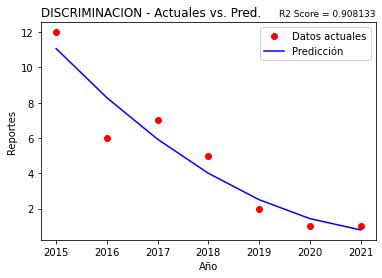

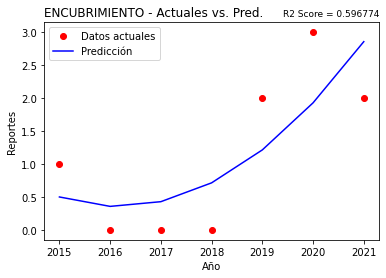

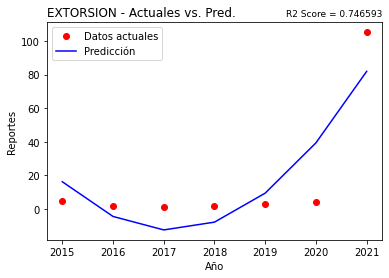

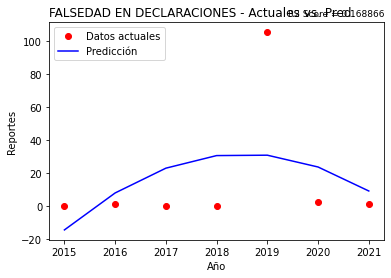

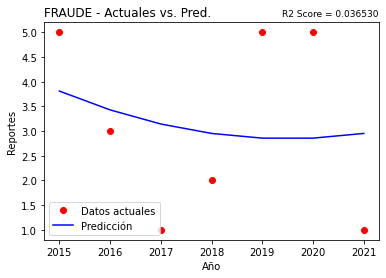

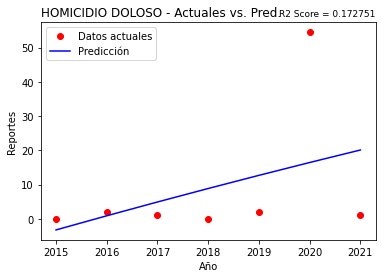

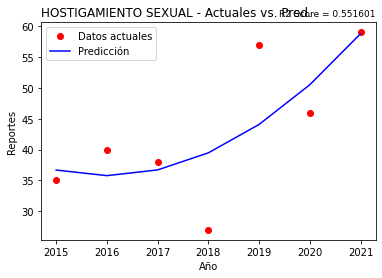

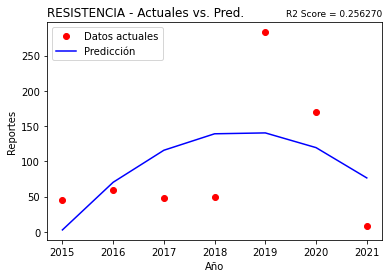

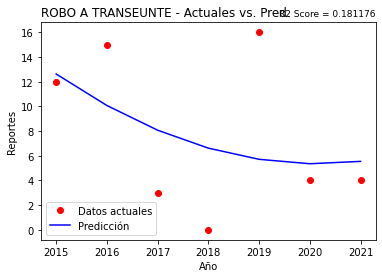

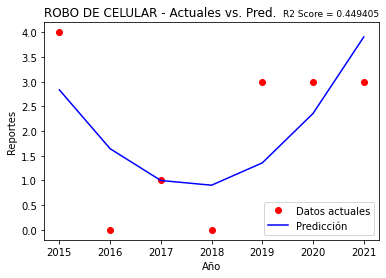

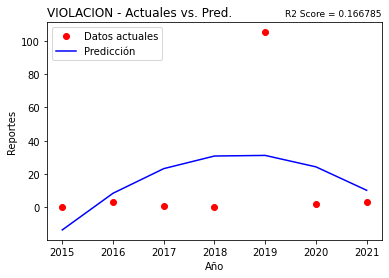

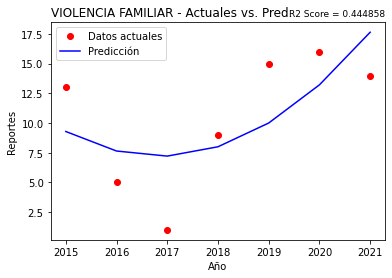

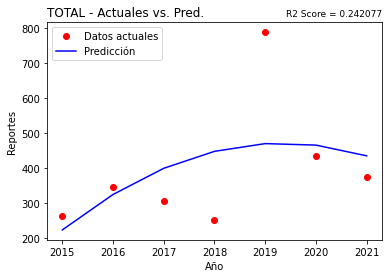

In [64]:
Años = list(range(2015, 2022))

X = Años
k = 0

X = np.array(Años).reshape((-1, 1))

predicciones = []

#Variable para predecir el número de homicidios del siguiente año
año_siguiente = [2022]
X2 = np.array(año_siguiente).reshape((-1, 1))

k = 1
Reporte1 = reporte1
Reporte1.pop(0)

for i in Reporte1:
  Total = list(df_delitos.loc[i])

  #Se crea un modelo de regresión lineal y se ajusta a un polinomio de grado 2 con la función PolynomialFeatures()
  model = make_pipeline(PolynomialFeatures(2), LinearRegression())
  model.fit(X, Total)

  plt.figure()
  plt.plot(X, Total, 'ro',label='Datos actuales')
  #Se grafica la predicción de los datos utilizando el modelo encontrado
  plt.plot(X, model.predict(X), '-b', label="Predicción")

  #Se guarda la predicción del número de homicidios de la entidad correspondiente
  predicciones.append(model.predict(X2))

  if (i=="Total"):
    plt.title("México - Actuales vs. Pred.", loc = 'left', fontsize = 12)
  else:
    plt.title("%s - Actuales vs. Pred." % i, loc = 'left', fontsize = 12)

  plt.xlabel("Año")
  plt.ylabel("Reportes")

  #Se calcula el coeficiente el puntaje R2 y se agrega a la gráfica
  coef = r2_score(Total, model.predict(X))
  r2_title = "R2 Score = %f" % coef
  plt.title(r2_title,  loc = 'right', fontsize=9)

  plt.legend(loc='best')
  plt.show()

  k += 1


A partir los datos de períodos anteriores, indicar cuántos serán los reportes en el año 2022.

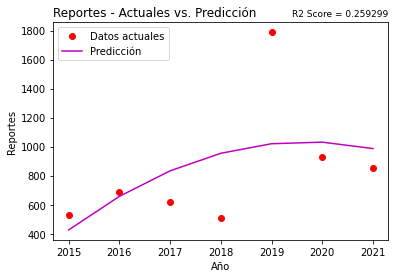

En 2022, se estima que habrá un total de 887 reportes


In [67]:
X = np.array(Años).reshape((-1, 1))

#Se guarda el año a predecir (2022) en un arreglo bidimensional para poder utilzarlo en la función predict()
X2 = np.array([2022]).reshape((-1,1))
Total = []

#Ciclo para guardar en un arreglo las cantidades de homicidio por género, por año
Total = df_delitos.sum()

#Se crea un modelo de regresión lineal y se ajusta a un polinomio de grado 2 con la función PolynomialFeatures()
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

#Se ajusta el modelo al año 2020 para predecir la cantidad de homicidios que habrá este año
pred_2022 = model.fit(X, Total).predict(X2)

plt.plot(X, Total, 'ro',label='Datos actuales')
plt.plot(X, model.predict(X), '-m', label="Predicción")

plt.title("Reportes - Actuales vs. Predicción", loc = 'left', fontsize = 12)
plt.xlabel("Año")
plt.ylabel("Reportes")

coef = r2_score(Total, model.predict(X))
r2_title = "R2 Score = %f" % coef
plt.title(r2_title,  loc = 'right', fontsize=9)

plt.legend(loc='best')
plt.show()

print("En 2022, se estima que habrá un total de %d reportes" % pred_2022[0])